
# Data Cleaning & Visualization with **pandas** and **matplotlib**  
**Duration:** ~2 hours

### Agenda
1. Setup & data import (10 min)  
2. Quick EDA: shape, preview, dtypes, info, describe (15 min)  
3. Cleaning: missing values, duplicates, types, invalids, outliers (35 min)  
4. Feature engineering: derived columns, bins, date parts (20 min)  
5. Visualizations with matplotlib: hist, box, scatter, bar, line (30 min)  
6. Groupby & pivots + small project/exercises (10–15 min)



## 0) Environment setup

> If you're on Colab, you can skip installation of pandas/matplotlib; they are preinstalled.  
> For local Jupyter, ensure you have Python 3.9+ and run:

```bash
pip install pandas matplotlib numpy
```



## (Optional) Getting a larger dataset from Kaggle

1. Create a Kaggle account → Account → **Create New API Token** → this downloads `kaggle.json`.  
2. In your environment, place `kaggle.json` under `~/.kaggle/` (Linux/Mac) or `C:\Users\<you>\.kaggle\` (Windows).  
3. Install the CLI and download a dataset, e.g. NYC Taxi Trips (large) or Retail datasets (medium):

```bash
pip install kaggle
kaggle datasets download -d nyc-taxi-data/nyc-yellow-taxi-trip-data
# or another dataset, then unzip:
unzip nyc-yellow-taxi-trip-data.zip -d data/
```

> For this class notebook, we'll start with the small sample `sample_data.csv`.  
> If you download a Kaggle dataset, just change `DATA_SOURCE` below to your file path.


pandas (pd): Library for working with data tables (loading CSVs, cleaning, analyzing, etc.).
numpy (np): Library for numerical operations, arrays, math functions. Pandas is built on top of NumPy.
matplotlib.pyplot (plt): The plotting library we’ll use for charts (histograms, scatter, bar plots, etc.).

# **%matplotlib inline**

This is a Jupyter Notebook magic command (not Python code).
It tells Jupyter to display matplotlib plots inside the notebook, just below the code cell.
Without it, plots might open in a separate window (not ideal for teaching).

In [3]:

# 1) Imports & config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Inline plots
%matplotlib inline

These lines configure how pandas prints tables (DataFrames).

display.max_columns = 50: show up to 50 columns when printing (instead of cutting off with ...).

display.width = 120: set the “width” of the output to 120 characters so columns don’t wrap too soon.

In [4]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

## 2) Load Data

In this step, we load our dataset into a **pandas DataFrame**.

```python

In [5]:

# 2) Load data
# Change this to your Kaggle file path when you're ready, e.g. "data/yellow_tripdata_2024-01.parquet"
DATA_SOURCE = "sample_data.csv"
df = pd.read_csv(DATA_SOURCE, parse_dates=["order_date"])
print(df.shape)
df.head()


(400, 8)


,order_id,order_date,category,region,price,quantity,discount,revenue
0,1000,2022-04-13,C,East,10.55,2,0.022,20.64
1,1001,2022-12-15,D,South,34.59,8,0.114,245.17
2,1002,2022-09-28,A,West,42.80,7,0.043,286.72
3,1003,2022-04-17,A,North,37.41,6,0.031,217.50
4,1004,2022-03-13,A,West,NaN,4,0.114,68.43


## 3) Quick EDA

## What is EDA?

**EDA = Exploratory Data Analysis**  
It is the process of **looking at your dataset before doing any cleaning, modeling, or visualization**.  

The main goals of EDA are:
1. **Understand the structure** → How many rows & columns? What data types?  
2. **Detect problems** → Missing values, duplicates, invalid entries.  
3. **Spot patterns** → Trends, distributions, relationships.  
4. **Ask better questions** → EDA helps us decide *what to clean* and *what to analyze further*.

### Typical EDA steps:
- **Shape of dataset** → `df.shape` → rows & columns.  
- **Preview data** → `df.head()`, `df.tail()`, `df.sample()`.  
- **Column info** → `df.info()`, `df.dtypes`.  
- **Missing values** → `df.isna().sum()`.  
- **Basic statistics** → `df.describe()` (mean, median, min, max, quartiles).  
- **Value counts** → `df['column'].value_counts()` for categorical columns.  

### Why it matters
Think of EDA like **meeting your dataset for the first time**:  
- You “look around” the table,  
- See if anything looks unusual,  
- And decide what to clean up or explore further.  


In [6]:

# Preview, dtypes, missingness
display(df.head())
display(df.tail())
display(df.sample(5, random_state=2))
print("\nDTypes:")
print(df.dtypes)
print("\nMissing values:")
print(df.isna().sum())
print("\nBasic stats:")
display(df.describe(include="all"))


,order_id,order_date,category,region,price,quantity,discount,revenue
0,1000,2022-04-13,C,East,10.55,2,0.022,20.64
1,1001,2022-12-15,D,South,34.59,8,0.114,245.17
2,1002,2022-09-28,A,West,42.80,7,0.043,286.72
3,1003,2022-04-17,A,North,37.41,6,0.031,217.50
4,1004,2022-03-13,A,West,NaN,4,0.114,68.43


,order_id,order_date,category,region,price,quantity,discount,revenue
395,1395,2022-06-02,C,North,12.33,8,0.093,89.47
396,1396,2022-07-05,C,East,36.72,0,0.069,0.00
397,1397,2022-03-04,B,North,6.74,4,0.056,25.45
398,1398,2022-07-09,B,West,35.21,3,0.053,100.03
399,1399,2022-05-05,C,South,5.39,3,0.085,14.80


,order_id,order_date,category,region,price,quantity,discount,revenue
94,1094,2022-03-06,D,North,28.26,5,0.127,123.35
32,1032,2022-07-07,A,South,43.37,3,0.042,124.65
225,1225,2022-09-12,B,North,35.46,4,0.108,126.52
157,1157,2022-10-11,D,South,43.38,4,0.124,152.00
356,1356,2022-02-27,A,East,30.64,4,0.159,103.07



DTypes:
order_id               int64
order_date    datetime64[ns]
category              object
region                object
price                float64
quantity               int64
discount             float64
revenue              float64
dtype: object

Missing values:
order_id       0
order_date     0
category       0
region         0
price         12
quantity       0
discount       0
revenue        0
dtype: int64

Basic stats:


C:\Users\91974\AppData\Local\Temp\ipykernel_21872\1654744991.py:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df.describe(include="all"))


,order_id,order_date,category,region,price,quantity,discount,revenue
count,400.000000,400,400,400,388.000000,400.000000,400.000000,400.000000
unique,NaN,234,5,5,NaN,NaN,NaN,NaN
top,NaN,2022-04-09 00:00:00,A,East,NaN,NaN,NaN,NaN
freq,NaN,6,135,106,NaN,NaN,NaN,NaN
first,NaN,2022-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,1199.500000,NaN,NaN,NaN,28.663943,4.865000,0.078905,128.953375
std,115.614301,NaN,NaN,NaN,20.024875,2.368713,0.038902,108.726531
min,1000.000000,NaN,NaN,NaN,2.070000,-1.000000,0.000000,0.000000
25%,1099.750000,NaN,NaN,NaN,14.077500,3.000000,0.050000,48.060000


In [7]:
# Numeric summary
display(df.describe())

# Datetime summary
display(df[["order_date"]].describe(datetime_is_numeric=True))

# Categorical summary
display(df.describe(include=["object", "category"]))

,order_id,price,quantity,discount,revenue
count,400.000000,388.000000,400.000000,400.000000,400.000000
mean,1199.500000,28.663943,4.865000,0.078905,128.953375
std,115.614301,20.024875,2.368713,0.038902,108.726531
min,1000.000000,2.070000,-1.000000,0.000000,0.000000
25%,1099.750000,14.077500,3.000000,0.050000,48.060000
50%,1199.500000,23.880000,5.000000,0.079000,98.270000
75%,1299.250000,38.177500,7.000000,0.107250,170.015000
max,1399.000000,121.600000,12.000000,0.187000,539.510000


,order_date
count,400
mean,2022-07-06 01:12:00
min,2022-01-02 00:00:00
25%,2022-04-14 00:00:00
50%,2022-07-06 12:00:00
75%,2022-09-30 06:00:00
max,2022-12-31 00:00:00


,category,region
count,400,400
unique,5,5
top,A,East
freq,135,106


## 4) Cleaning

In [8]:

# 4.1) Remove exact duplicate rows
before = len(df)
df = df.drop_duplicates()
print(f"Removed {before - len(df)} duplicate rows")

# 4.2) Trim/standardize strings (example: region)
if "region" in df.columns:
    df["region"] = df["region"].astype(str).str.strip().str.title()

# 4.3) Handle invalid values (example: negative quantity should be NaN)
if "quantity" in df.columns:
    df.loc[df["quantity"] < 0, "quantity"] = np.nan

# 4.4) Convert types explicitly when needed
if "category" in df.columns:
    df["category"] = df["category"].astype("category")

# 4.5) Missing data strategies
# Example: numeric impute with median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].apply(lambda s: s.fillna(s.median()))

# Example: categorical impute with mode
cat_cols = df.select_dtypes(include=["object","category"]).columns
for c in cat_cols:
    mode = df[c].mode(dropna=True)
    if not mode.empty:
        df[c] = df[c].fillna(mode[0])

print("Done basic cleaning.")
df.head()


Removed 0 duplicate rows
Done basic cleaning.


,order_id,order_date,category,region,price,quantity,discount,revenue
0,1000,2022-04-13,C,East,10.55,2.0,0.022,20.64
1,1001,2022-12-15,D,South,34.59,8.0,0.114,245.17
2,1002,2022-09-28,A,West,42.80,7.0,0.043,286.72
3,1003,2022-04-17,A,North,37.41,6.0,0.031,217.50
4,1004,2022-03-13,A,West,23.88,4.0,0.114,68.43


In [10]:
num_cols = df.select_dtypes(include=[np.number]).columns
print(num_cols)

Index(['order_id', 'price', 'quantity', 'discount', 'revenue'], dtype='object')


In [10]:

# 4.6) Outlier detection (IQR method) for a numeric column
def iqr_outlier_bounds(series, factor=1.5):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - factor * iqr
    upper = q3 + factor * iqr
    return lower, upper

target_col = "price" if "price" in df.columns else None
if target_col:
    lower, upper = iqr_outlier_bounds(df[target_col])
    print(f"{target_col} bounds: {lower:.2f}..{upper:.2f}")
    outliers = (df[target_col] < lower) | (df[target_col] > upper)
    print("Outliers count:", int(outliers.sum()))
    # Option: cap/floor (winsorize) rather than drop
    df[target_col] = df[target_col].clip(lower, upper)


price bounds: -20.58..72.26
Outliers count: 16


## 5) Feature Engineering

In [11]:

# Example features
if "order_date" in df.columns:
    df["year"] = df["order_date"].dt.year
    df["month"] = df["order_date"].dt.month
    df["dow"] = df["order_date"].dt.day_name()

if {"price","quantity"}.issubset(df.columns):
    df["gross"] = df["price"] * df["quantity"]

print(df.head())


   order_id order_date category region  price  quantity  discount  revenue  year  month        dow   gross
0      1000 2022-04-13        C   East  10.55       2.0     0.022    20.64  2022      4  Wednesday   21.10
1      1001 2022-12-15        D  South  34.59       8.0     0.114   245.17  2022     12   Thursday  276.72
2      1002 2022-09-28        A   West  42.80       7.0     0.043   286.72  2022      9  Wednesday  299.60
3      1003 2022-04-17        A  North  37.41       6.0     0.031   217.50  2022      4     Sunday  224.46
4      1004 2022-03-13        A   West  23.88       4.0     0.114    68.43  2022      3     Sunday   95.52


## 6) Visualizations with matplotlib

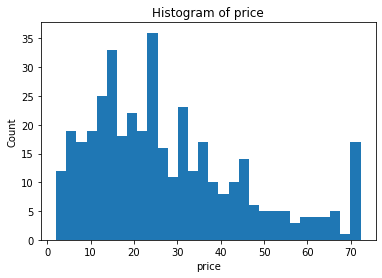

In [12]:

# Histogram
col = "price" if "price" in df.columns else df.select_dtypes(include=[np.number]).columns[0]
plt.figure()
plt.hist(df[col].dropna(), bins=30)
plt.title(f"Histogram of {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()


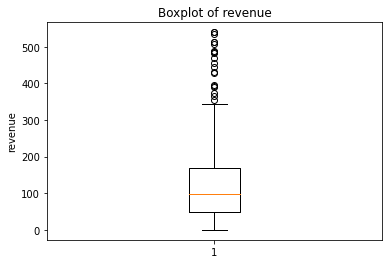

In [13]:

# Boxplot
col = "revenue" if "revenue" in df.columns else df.select_dtypes(include=[np.number]).columns[0]
plt.figure()
plt.boxplot(df[col].dropna(), vert=True)
plt.title(f"Boxplot of {col}")
plt.ylabel(col)
plt.show()


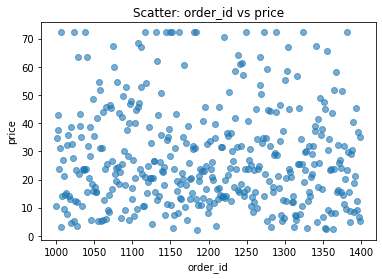

In [14]:

# Scatter (numeric vs numeric)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) >= 2:
    x, y = num_cols[0], num_cols[1]
    plt.figure()
    plt.scatter(df[x], df[y], alpha=0.6)
    plt.title(f"Scatter: {x} vs {y}")
    plt.xlabel(x); plt.ylabel(y)
    plt.show()


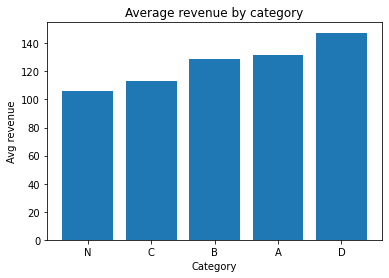

In [15]:

# Bar plot (category vs aggregated metric)
if "category" in df.columns and "revenue" in df.columns:
    grouped = df.groupby("category")["revenue"].mean().sort_values()
    plt.figure()
    plt.bar(grouped.index.astype(str), grouped.values)
    plt.title("Average revenue by category")
    plt.xlabel("Category"); plt.ylabel("Avg revenue")
    plt.xticks(rotation=0)
    plt.show()


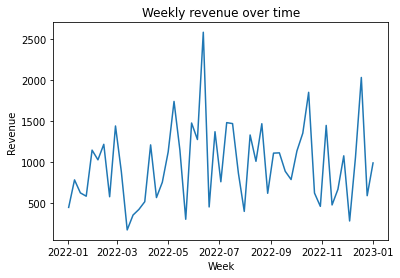

In [16]:

# Line (time series)
if "order_date" in df.columns and "revenue" in df.columns:
    ts = df.set_index("order_date")["revenue"].resample("W").sum()
    plt.figure()
    plt.plot(ts.index, ts.values)
    plt.title("Weekly revenue over time")
    plt.xlabel("Week"); plt.ylabel("Revenue")
    plt.show()


## 7) Groupby & Pivot

In [17]:

if {"region","category","revenue"}.issubset(df.columns):
    table = df.pivot_table(index="region", columns="category", values="revenue", aggfunc="mean")
    display(table.round(2))


category,A,B,C,D,N
region,,,,,
East,122.93,104.35,115.41,193.58,133.95
North,157.16,132.57,114.68,148.17,65.94
South,121.75,163.54,74.53,110.13,NaN
Wes,68.69,123.08,37.41,NaN,NaN
West,133.15,115.29,135.48,113.13,169.66



## 8) Mini Project & Exercises

1. **Missingness map:** Calculate missingness % per column and plot a bar chart.  
2. **Custom clean rules:** Identify and fix at least 2 additional "dirty" data patterns.  
3. **Outliers:** Choose a different column, detect outliers with IQR, and compare distributions before/after capping.  
4. **Feature idea:** Create a new feature that could improve a predictive model (e.g., `price_after_discount`). Plot its distribution.  
5. **Groupby challenge:** Find the top 3 categories by total revenue per region. Visualize with a grouped bar chart.  
6. **Time series:** If you use a Kaggle dataset with timestamps, build a daily/weekly trend plot and annotate the max/min.  
7. **Stretch:** Build a clean, single-figure dashboard with 2–3 subplots showing key insights from your cleaned data.
